In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob

In [170]:
DATA_DIR = "c:\\Users\\macie\\Desktop\\studia\\repos\\framspy\\"

In [195]:
csv_files = glob.glob(f"{DATA_DIR}\\evolution-*")
df_list = [pd.read_csv(file) for file in csv_files]
df = pd.concat(df_list, ignore_index=True)

C:\Users\macie\AppData\Local\Temp\ipykernel_15388\2133569763.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 7)


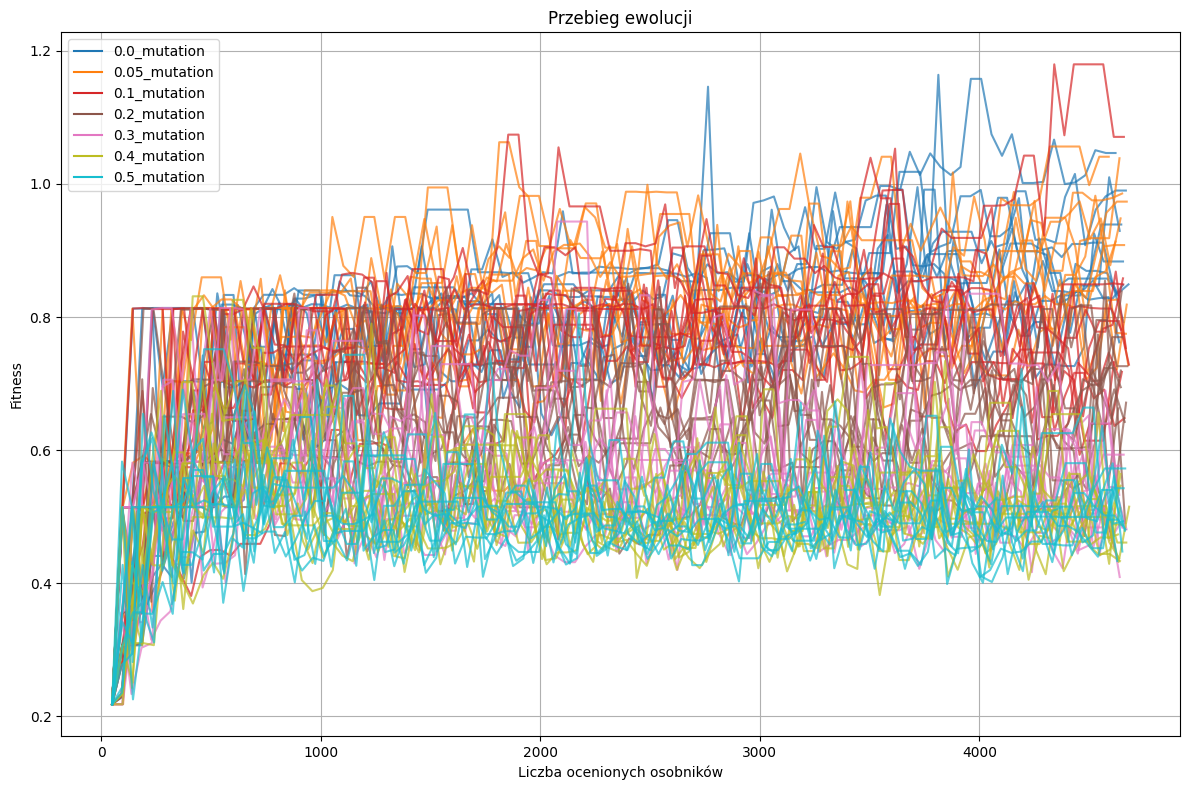

In [257]:
cmap = plt.cm.get_cmap('tab10', 7)
colors = [cmap(i) for i in range(7)]
plt.figure(figsize=(12, 8))
for i, (mutation_value, mutation_runs_df) in enumerate(df.groupby('mutation')):
    for run_index, run_df in mutation_runs_df.groupby('run'):
        plt.plot(run_df['nevals'].cumsum(), run_df['max'], alpha=0.7, color=colors[i])
for i, (mutation_value, mutation_runs_df) in enumerate(df.groupby('mutation')):
    plt.plot([], [], color=colors[i], label=f'{mutation_value}_mutation')
plt.title('Przebieg ewolucji')
plt.xlabel('Liczba ocenionych osobników')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\macie\AppData\Local\Temp\ipykernel_15388\2870730703.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('tab10', 7)


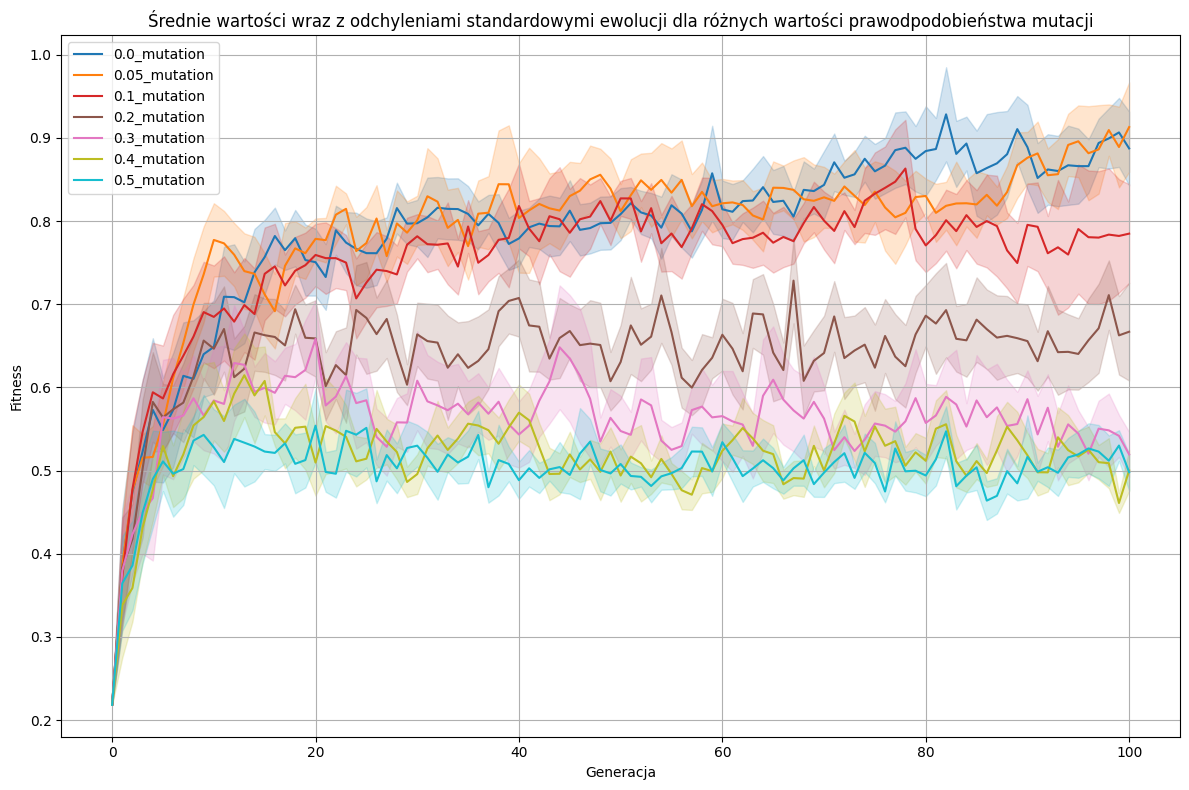

In [ ]:
cmap = plt.cm.get_cmap('tab10', 7)
colors = [cmap(i) for i in range(7)]
plt.figure(figsize=(12, 8))
for i, (mutation_value, mutation_runs_df) in enumerate(df.groupby('mutation')):
    mean_values = mutation_runs_df.groupby('gen')['max'].mean().values
    std_values = mutation_runs_df.groupby('gen')['max'].std().values
    gen_values = mutation_runs_df.groupby('gen')['max'].mean().index

    plt.plot(gen_values, mean_values, color=colors[i])
    plt.fill_between(gen_values, mean_values - std_values/2, mean_values + std_values/2, color=colors[i], alpha=0.2)
for i, (mutation_value, mutation_runs_df) in enumerate(df.groupby('mutation')):
    plt.plot([], [], color=colors[i], label=f'{mutation_value}_mutation')
plt.title('Średnie wartości wraz z odchyleniami standardowymi ewolucji dla różnych wartości prawodpodobieństwa mutacji')
plt.xlabel('Generacja')
plt.ylabel('Fitness')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [248]:
df['mutation'].unique()

array([0.  , 0.05, 0.1 , 0.2 , 0.3 , 0.4 , 0.5 ])

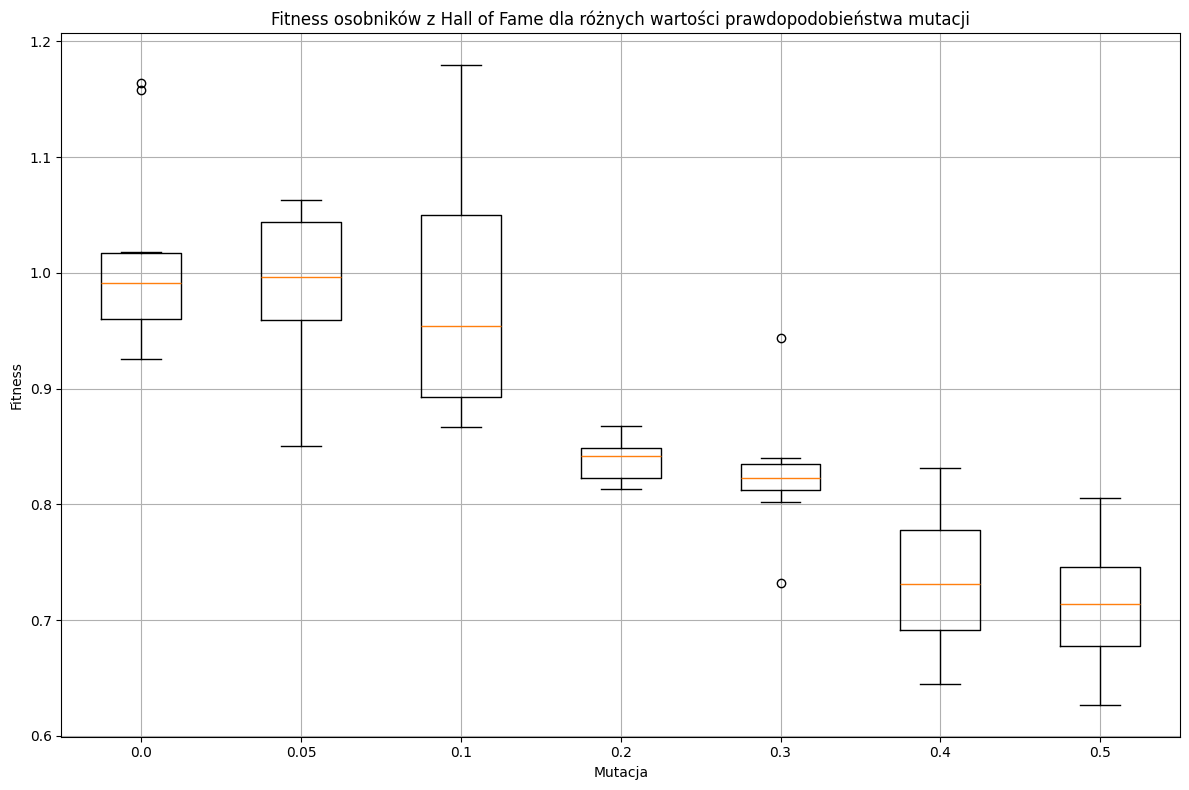

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Create an empty list to store the data for each box plot
data = []

# Iterate over the grouped dataframe
for i, (mutation_value, mutation_runs_df) in enumerate(df.groupby('mutation')):
    # Gather the max values for each run
    max_values = mutation_runs_df.groupby('run')['max'].max().values
    data.append(max_values)

# Create the box plots, with positions based on the index 'i'
plt.boxplot(data)

# Set x-axis labels for each box plot based on mutation values
plt.xticks(range(1, len(df['mutation'].unique()) + 1), df['mutation'].unique())
plt.title('Fitness osobników z Hall of Fame dla różnych wartości prawdopodobieństwa mutacji')
# Add axis labels
plt.xlabel('Mutacja')
plt.ylabel('Fitness')

# Display grid and adjust layout
plt.grid(True)
plt.tight_layout()
    
# Show the plot
plt.show()
